# 数量化一類
アーティストとその他4つの質的データから、量的データである人気度を予測する

In [1]:
import numpy as np
import pandas as pd

In [3]:
tunes = pd.read_csv("C:/Users/kisho/Documents/csv/spotify_data/tunes_data_2.csv", encoding="cp932")
tunes

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,...,liveness,loudness,speechiness,tempo,time_signature,valence,mv,tie-up,mode,intense
0,0,悪魔,悪魔,笹川真生,2020/5/29,211244,30,0.710,0.06730,0.353,...,0.0871,-7.550,0.0523,67.013,4,0.711,1,0,0,0
1,1,エイプリル,エイプリル,笹川真生,2020/5/1,278222,22,0.621,0.00694,0.587,...,0.0780,-6.203,0.0330,135.016,4,0.543,1,0,1,0
2,2,三文芝居,あたらしいからだ,笹川真生,2019/9/18,232293,18,0.769,0.01330,0.517,...,0.0932,-7.011,0.0350,133.055,4,0.660,1,0,0,0
3,3,産声,産声,笹川真生,2020/3/27,206000,16,0.496,0.02650,0.404,...,0.2610,-9.167,0.0344,137.845,4,0.190,1,0,0,0
4,4,キャロル,あたらしいからだ,笹川真生,2019/9/18,230106,15,0.448,0.06680,0.557,...,0.3500,-8.611,0.0454,151.821,4,0.241,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,Soul,YELLOW DANCER,Gen Hoshino,2015/12/2,229200,32,0.665,0.21900,0.471,...,0.2320,-6.511,0.1580,82.908,4,0.902,0,0,1,0
95,96,地獄でなぜ悪い,YELLOW DANCER,Gen Hoshino,2015/12/2,221266,46,0.652,0.20500,0.894,...,0.3310,-4.306,0.0601,127.067,4,0.892,1,1,0,1
96,97,桜の森,YELLOW DANCER,Gen Hoshino,2015/12/2,310333,45,0.870,0.25700,0.630,...,0.1410,-5.767,0.0470,122.024,4,0.926,0,0,1,0
97,98,Snow Men,YELLOW DANCER,Gen Hoshino,2015/12/2,274000,42,0.843,0.21600,0.331,...,0.0426,-8.393,0.0516,87.411,4,0.731,1,1,0,0


In [5]:
tunes = tunes[["name", "artist", "popularity", "mv", "tie-up", "mode", "intense"]]
tunes

,name,artist,popularity,mv,tie-up,mode,intense
0,悪魔,笹川真生,30,1,0,0,0
1,エイプリル,笹川真生,22,1,0,1,0
2,三文芝居,笹川真生,18,1,0,0,0
3,産声,笹川真生,16,1,0,0,0
4,キャロル,笹川真生,15,1,0,0,0
...,...,...,...,...,...,...,...
94,Soul,Gen Hoshino,32,0,0,1,0
95,地獄でなぜ悪い,Gen Hoshino,46,1,1,0,1
96,桜の森,Gen Hoshino,45,0,0,1,0
97,Snow Men,Gen Hoshino,42,1,1,0,0


In [8]:
# artistにどんな値があるか確認
print(tunes["artist"].unique())
# artistの種類の数
print(tunes["artist"].nunique())

['笹川真生' 'Kenshi Yonezu' 'キタニタツヤ' 'YOASOBI' 'ヨルシカ' 'Vaundy' 'Gen Hoshino']
7


In [13]:
# アーティスト名を変換
before = tunes["artist"].unique()

after = ["sasagawa_mao", "yonezu_kenshi",
         "kitani_tatsuya", "yoasobi", "yorushika",
         "vaundy", "hoshino_gen"]

tunes["artist"] = tunes["artist"].replace(before, after)

tunes

<ipython-input-13-0f66f47e70e4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tunes["artist"] = tunes["artist"].replace(before, after)


,name,artist,popularity,mv,tie-up,mode,intense
0,悪魔,sasagawa_mao,30,1,0,0,0
1,エイプリル,sasagawa_mao,22,1,0,1,0
2,三文芝居,sasagawa_mao,18,1,0,0,0
3,産声,sasagawa_mao,16,1,0,0,0
4,キャロル,sasagawa_mao,15,1,0,0,0
...,...,...,...,...,...,...,...
94,Soul,hoshino_gen,32,0,0,1,0
95,地獄でなぜ悪い,hoshino_gen,46,1,1,0,1
96,桜の森,hoshino_gen,45,0,0,1,0
97,Snow Men,hoshino_gen,42,1,1,0,0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

<AxesSubplot:xlabel='artist', ylabel='popularity'>

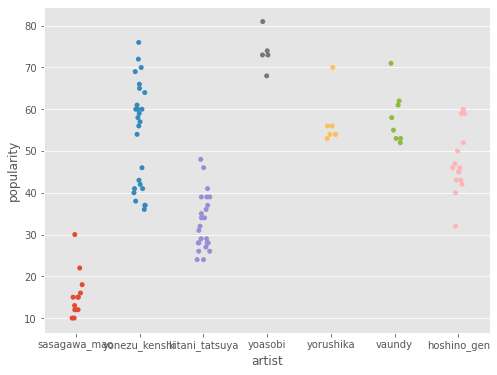

In [20]:
plt.figure(figsize=(8, 6))
sns.stripplot(x="artist", y="popularity", data=tunes)

In [21]:
# アーティストダミー変数を作成
dummies = pd.get_dummies(tunes["artist"])
dummies

,hoshino_gen,kitani_tatsuya,sasagawa_mao,vaundy,yoasobi,yonezu_kenshi,yorushika
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
94,1,0,0,0,0,0,0
95,1,0,0,0,0,0,0
96,1,0,0,0,0,0,0
97,1,0,0,0,0,0,0


In [22]:
tunes = pd.concat([tunes, dummies], axis=1)
tunes

,name,artist,popularity,mv,tie-up,mode,intense,hoshino_gen,kitani_tatsuya,sasagawa_mao,vaundy,yoasobi,yonezu_kenshi,yorushika
0,悪魔,sasagawa_mao,30,1,0,0,0,0,0,1,0,0,0,0
1,エイプリル,sasagawa_mao,22,1,0,1,0,0,0,1,0,0,0,0
2,三文芝居,sasagawa_mao,18,1,0,0,0,0,0,1,0,0,0,0
3,産声,sasagawa_mao,16,1,0,0,0,0,0,1,0,0,0,0
4,キャロル,sasagawa_mao,15,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Soul,hoshino_gen,32,0,0,1,0,1,0,0,0,0,0,0
95,地獄でなぜ悪い,hoshino_gen,46,1,1,0,1,1,0,0,0,0,0,0
96,桜の森,hoshino_gen,45,0,0,1,0,1,0,0,0,0,0,0
97,Snow Men,hoshino_gen,42,1,1,0,0,1,0,0,0,0,0,0


# 数量化一類
popularityを予測する

In [25]:
# 説明変数
X = tunes.drop(["name", "artist", "popularity"], axis=1)
X

,mv,tie-up,mode,intense,hoshino_gen,kitani_tatsuya,sasagawa_mao,vaundy,yoasobi,yonezu_kenshi,yorushika
0,1,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,1,0,1,0,0,0,0,0,0
95,1,1,0,1,1,0,0,0,0,0,0
96,0,0,1,0,1,0,0,0,0,0,0
97,1,1,0,0,1,0,0,0,0,0,0


In [26]:
# 目的変数
y = tunes["popularity"]
y

0     30
1     22
2     18
3     16
4     15
      ..
94    32
95    46
96    45
97    42
98    45
Name: popularity, Length: 99, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression()

reg.fit(X, y)
predicts = reg.predict(X)

# 予測結果
print(predicts)

[18.18827923 17.87257507 18.18827923 18.18827923 18.18827923 18.18827923
 11.89920047 18.18827923 12.29983715 12.29983715 11.89920047 12.29983715
 12.29983715 54.36601247 54.76664914 61.42094385 61.50587636 61.82158052
 48.87820705 61.82158052 48.16186622 55.53250176 48.87820705 61.82158052
 48.56250289 48.16186622 61.42094385 61.10523969 48.56250289 48.87820705
 54.36601247 48.16186622 54.36601247 54.05030831 61.50587636 48.47757038
 48.47757038 54.45094498 48.47757038 41.14601179 34.09108041 34.09108041
 34.49171708 28.28757083 28.20263832 34.09108041 34.49171708 33.77537625
 34.49171708 28.603275   28.603275   34.09108041 34.09108041 34.09108041
 34.09108041 28.603275   34.09108041 28.603275   28.20263832 34.09108041
 28.603275   34.49171708 34.09108041 34.49171708 75.02384275 74.70813859
 75.10877526 69.13540066 75.02384275 51.39464164 57.6837204  51.47957415
 57.6837204  56.96737956 57.36801624 64.42294762 58.17031497 57.45397413
 57.8546108  65.22524635 51.56553204 51.96616872 57

In [40]:
print("切片", reg.intercept_)
print("回帰係数", reg.coef_)
print("決定係数", reg.score(X,y))

切片 42.707406977975
回帰係数 [  5.88844209   7.05493138  -0.31570416  -0.40063667  -0.09513447
 -14.10413198 -30.40756983   9.5744659   19.77369897   6.17080008
   9.08787133]
決定係数 0.8428037860286886


### 数量化一類の結果

切片    = 42.71  
MV      = 7.05  
mode    = -0.32  
intense = -0.40  
  
星野源  = -0.095  
キタニタツヤ = -14.10  
笹川真生 = -30.41  
Vaundy   = 9.57  
YOASOBI  = 19.77  
米津玄師 = 6.17  
ヨルシカ = 9.09

切片を基準に  
MVがあると人気度が7.05上がる。  
YOASOBIの曲であれば人気度がとても上がる。  
Vaundy、ヨルシカ、米津玄師と続く。  
キタニタツヤと笹川真生は知名度がまだ足りないため人気度は基準より下がる。  
  
概ね予想通りの結果。